In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
column_names=['user_id','item_id','rating','timestamp'] #no column name in the file
data = pd.read_csv('ml-100k/ml-100k/u.data',sep = '\t',names=column_names) #seperated by tabs

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
print(data.shape)

(100000, 4)


In [6]:
data['user_id'].nunique() #unique user_id or user numbers in dataset

943

In [7]:
movie_titles = pd.read_csv('ml-100k/ml-100k/u.item',sep = '\|',header = None) #seeing other dataset which has the movie names

In [8]:
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movie_titles = movie_titles[[0,1]]

In [11]:
movie_titles

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [12]:
movie_titles.columns=['item_id','movie_name']

In [13]:
movie_titles

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [14]:
data_new = pd.merge(movie_titles,data,on = "item_id") #item_id is a common field from both dataset so merging the 2 on the basis
                                                    # of item_id

In [15]:
data_new.head(n=10)

,item_id,movie_name,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
5,1,Toy Story (1995),5,4,875635748
6,1,Toy Story (1995),109,4,880563619
7,1,Toy Story (1995),181,3,878962392
8,1,Toy Story (1995),95,5,879197329
9,1,Toy Story (1995),268,3,875742341


# EDA 



In [16]:
data_new['rating'].describe() #counting every stastical data of 'rating' in the dataset

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [17]:
data_new.groupby('movie_name').count()['user_id'].sort_values(ascending = False) #count 'user_id' will count people who have 
                                                                                    # rated the movie

movie_name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: user_id, Length: 1664, dtype: int64

### shows starwars(1977) has been watched maximum number of times

In [18]:
data_new.groupby('movie_name').mean()['rating'].sort_values(ascending = False) #grouping by mean rating of each movie_name

movie_name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [19]:
ratings = pd.DataFrame(data_new.groupby('movie_name').mean()['rating'])

In [20]:
ratings.head(n=10)

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [21]:
ratings['number_of_ratings'] = pd.DataFrame(data_new.groupby('movie_name').count()['user_id']) 

In [22]:
ratings.head(n=10)

,rating,number_of_ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [23]:
ratings.sort_values(by = 'number_of_ratings')

,rating,number_of_ratings
movie_name,,
Á köldum klaka (Cold Fever) (1994),3.000000,1
Mille bolle blu (1993),1.000000,1
Mat' i syn (1997),1.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Man from Down Under, The (1943)",1.000000,1
...,...,...
Liar Liar (1997),3.156701,485
Return of the Jedi (1983),4.007890,507
Fargo (1996),4.155512,508


In [24]:
import seaborn as sns

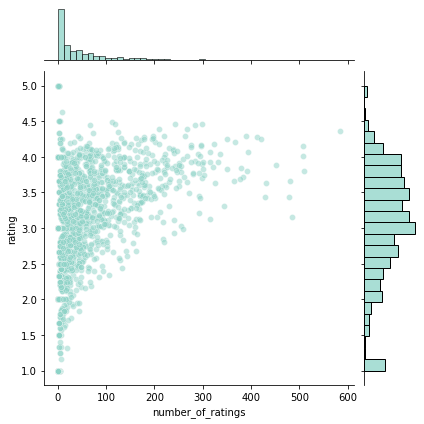

In [25]:
sns.set_palette("Set3",10)
sns.jointplot(data = ratings,x = 'number_of_ratings',y = 'rating',alpha = 0.5)

# MOVIE RECOMMENDATION SYSTEM


In [26]:
data_new.head(n=9)

,item_id,movie_name,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
5,1,Toy Story (1995),5,4,875635748
6,1,Toy Story (1995),109,4,880563619
7,1,Toy Story (1995),181,3,878962392
8,1,Toy Story (1995),95,5,879197329


In [27]:
movie_mat = data_new.pivot_table(index = 'user_id', columns = 'movie_name',values = 'rating')

In [28]:
movie_mat

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
LL_mat = movie_mat['Liar Liar (1997)']

In [30]:
movie_mat.corrwith(LL_mat)

movie_name
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [31]:

corr_Liar = pd.DataFrame(movie_mat.corrwith(LL_mat),columns = ['correlation'])


In [32]:
corr_Liar.dropna(inplace = True)

In [33]:
corr_Liar.sort_values('correlation',ascending = False).head(n=15)

,correlation
movie_name,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [34]:
corr_Liar = corr_Liar.join(ratings['number_of_ratings'])



In [35]:
corr_Liar.head(n=10)

,correlation,number_of_ratings
movie_name,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [36]:
corr_Liar[corr_Liar['number_of_ratings']>100].sort_values('correlation',ascending = False)

,correlation,number_of_ratings
movie_name,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


# CREATING A FUNCTION THAT ACCEPTS MOVIES NOW

In [46]:
def predict_movies(movie_name):
    movie_user_ratings = movie_mat[movie_name]
    corr_with_movie = movie_mat.corrwith(movie_user_ratings)
    
    
    corr_movie = pd.DataFrame(corr_with_movie,columns = ['correlation'])
    corr_movie.dropna(inplace = True)
    
    corr_movie = corr_movie.join(ratings['number_of_ratings'])
    predictions = corr_movie[corr_movie['number_of_ratings']>100].sort_values('correlation',ascending = False)
    return predictions


In [49]:

movie_result = predict_movies('101 Dalmatians (1996)')
movie_result.head()

,correlation,number_of_ratings
movie_name,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150
